In [ ]:
# Import libraries
import pandas as pd       
import seaborn as sns               
import numpy as np                      
import matplotlib.pyplot as plt                       

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import torch

In [4]:
# Import and Read data 
data = pd.read_pickle("mpg_cleaned.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    int64  
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   model_year     392 non-null    int64  
 7   origin         392 non-null    int64  
 8   car_name       392 non-null    object 
 9   car_maker      392 non-null    object 
 10  car_maker_num  392 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.8+ KB


# Clean Data 📁

In [ ]:
# Define X and y data for the model
X = data.drop(columns=['mpg', 'car_name','car_maker']).values
y = data["mpg"].values

# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaler Variable 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Data Shape
print(f"X_train Shape: {X_train.shape}") 
print(f"y_train Shape: {y_train.shape}")

# Test Data Shape
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (313, 8)
y_train Shape: (313,)
X_test Shape: (79, 8)
y_test Shape: (79,)


# torch 🐂🔥

In [11]:
# Import Libraries for pytorch implementation

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from torchsummary import summary
from sklearn.metrics import mean_absolute_error, r2_score

In [15]:
# Convert numpy data to tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1,1) # use reshape if view fails
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1,1) # use reshape if view fails


# wrap the data into dataloader for batching 
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# Load the Data 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [16]:
# define the class
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
       
model = RegressionNN(input_dim=X_train.shape[1])

In [18]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    if (epoch +1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/epochs], Loss: {running_loss/len(train_loader):.4f} ")

Epoch [10/epochs], Loss: 8.1973 
Epoch [20/epochs], Loss: 6.8278 
Epoch [30/epochs], Loss: 6.4419 
Epoch [40/epochs], Loss: 5.4909 
Epoch [50/epochs], Loss: 5.8770 
Epoch [60/epochs], Loss: 5.1729 
Epoch [70/epochs], Loss: 5.2542 
Epoch [80/epochs], Loss: 4.6815 
Epoch [90/epochs], Loss: 3.9755 
Epoch [100/epochs], Loss: 4.9718 


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


model.eval()
with torch.no_grad():
    y_pred = model(X_test_torch).numpy()
    y_true = y_test_torch.numpy()

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}")


Test MSE: 8.040
Test RMSE: 2.835
Test R²: 0.842


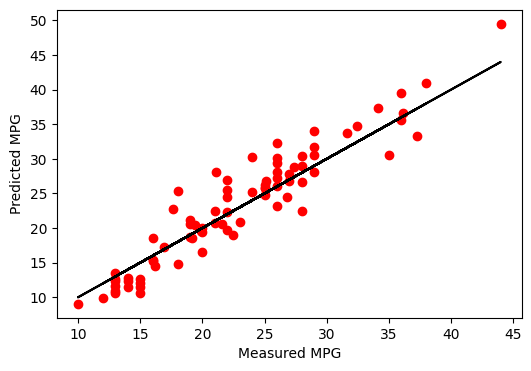

In [22]:
# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_true.flatten(), y=y_pred, color="red")
plt.plot(y_true, y_true, color="black")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()

# Another torch 🔥🐻